In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/wine.data', header=None)

df.columns = ['Class label', 'Alcohol',
                    'Malic acid', 'Ash',
                    'Alcalinity of ash', 'Magnesium',
                    'Total phenols', 'Flavanoids',
                    'Nonflavanoid phenols',
                    'Proanthocyanins',
                    'Color intensity', 'Hue',
                    'OD280/OD315 of diluted wines',
                    'Proline']


df.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
# Get a description of the dataset

df.describe()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [4]:
# Get the target and feature variables
from random import random


y = df[['Class label']]

X = df.drop(['Class label'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, 
                                                    random_state=0, stratify=y)

> First, we assigned  the feature columns 1-13 to the variable X and we assigned the class labels from the first column to the variable y. Then, we used the train_test_split function to randomly split X and y into separate training and test datasets. By setting test_size=0.3, we assigned 30 percent of the wine examples to X_test and y_test, and the remaining 70 percent of the examples were assigned to X_train and y_train, respectively. Providing the class label array y as an argument to stratify ensures that both training and test datasets have the same class proportions as the original dataset.

## Feature Scaling

Feature scaling is a crucial step in our preprocessing pipeline that can easily be forgotten. `Decision trees` and `random forests` are two of the very few machine learning algorithms where we don’t need to worry about feature scaling. Those algorithms are scale-invariant. However, the majority of machine learning and optimization algorithms behave much better if features are on the same scale.

> Now, there are two common approaches to bringing different features onto the same scale: `normalization` and `standardization`. Those terms are often used quite loosely in different fields, and the meaning has to be derived from the context. Most often, `normalization refers to the rescaling of the features to a range of [0, 1], which is a special case of min-max scaling.` Using `standardization, we center the feature columns at mean 0 with standard deviation 1 so that the feature columns have the same parameters as a standard normal distribution (zero mean and unit variance), which makes it easier to learn the weights.` 

Standardization does not change the shape of the distribution, and it does not transform non-normally distributed data into normally distributed data. In addition to scaling data such that it has zero mean and unit variance, standardization maintains useful information about outliers and makes the algorithm less sensitive to them in contrast to min-max scaling, which scales the data to a limited range of values.

In [5]:
# Performing MinMax Scaling

mms = MinMaxScaler()

X_train_norm = mms.fit_transform(X_train)
# Use the characteristics to fit the test set
X_test_norm = mms.transform(X_test)

In [6]:
# Performing standardization

std_sc = StandardScaler()

X_train_std = std_sc.fit_transform(X_train)
# Use the characteristics to fit the test set
X_test_std = std_sc.transform(X_test)

> It is also important to highlight that we fit the StandardScaler class only once—on the training data—and use those parameters to transform the test dataset or any new data point.

## Selecting Meaningful Features

If we notice that a model performs much better on a training dataset than on the test dataset, this observation is a strong indicator of overfitting. Overfitting means the model fits the parameters too closely with regard to the particular observations in the training dataset but does not generalize well to new data; we say that the model has a `high variance`. The reason for the overfitting is that our model is too complex for the given training data. Common solutions to reduce the overfitting are as follows:
- Introduce a Penalty for Complexity/Regularization
- Choose a simpler model with fewer parameters
- Reduce the dimensionality of the data

### Implementing L1 Regularization

>Note that we also need to select a different optimization algorithm (for example, solver='liblinear'),
since 'lbfgs' currently does not support L1-regularized loss optimization.

In [7]:
# Implementing L1 Regularization
l1_reg_lr = LogisticRegression(penalty='l1', 
                        C=1.0,
                        solver='liblinear',
                        multi_class='ovr' 
                        )

# Fit the regularized model to the standardized training data
l1_reg_lr.fit(X_train_std, y_train)

# Get the training accuracy
print(f'Training Accuracy --> {l1_reg_lr.score(X_train_std, y_train)}')

# Get the test accuracy
print(f'Test Accuracy --> {l1_reg_lr.score(X_test_std,y_test)}')

Training Accuracy --> 1.0
Test Accuracy --> 1.0


c:\Users\INNO\Documents\Python Development\Python Machine Learning - Third Edition\.py_ml_venv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
# Print the intercept
l1_reg_lr.intercept_

array([-1.2632854 , -1.21608839, -2.3705446 ])

In [9]:
# Print the weights
l1_reg_lr.coef_

array([[ 1.24572934,  0.1805966 ,  0.74271088, -1.16042723,  0.        ,
         0.        ,  1.17344782,  0.        ,  0.        ,  0.        ,
         0.        ,  0.54441057,  2.51073612],
       [-1.53668378, -0.3876489 , -0.99524172,  0.36499756, -0.05959617,
         0.        ,  0.66842854,  0.        ,  0.        , -1.93476507,
         1.23284425,  0.        , -2.23182745],
       [ 0.13523288,  0.16933731,  0.35774405,  0.        ,  0.        ,
         0.        , -2.43319533,  0.        ,  0.        ,  1.56237765,
        -0.81884212, -0.49640748,  0.        ]])

The weight array that we accessed via the lr.coef_ attribute contains three rows of weight coefficients, one weight vector for each class. Each row consists of 13 weights, where each weight is multiplied by the respective feature in the 13-dimensional Wine dataset to calculate the net input:

> Both training and test accuracies (both 100 percent) indicate that our model does a perfect job on
both datasets. Strictly speaking,
though, the weight vectors are not necessarily sparse because they contain
more non-zero than zero entries. However, we could enforce sparsity (more zero entries) by further
increasing the regularization strength—that is, choosing lower values for the C parameter.

### Sequential Feature Selection Algorithms

An way to reduce the complexity of the model and avoid overfitting
is `dimensionality reduction` via `feature selection`, which is especially useful for
unregularized models. There are `two main` categories of dimensionality reduction
techniques: `feature selection` and `feature extraction`. Via `feature selection`, we select
a `subset of the original features`, whereas in `feature extraction`, we `derive information from the feature set to construct a new feature subspace.`

> Sequential feature selection algorithms are a family of greedy search algorithms
that are used to reduce an initial d-dimensional feature space to a k-dimensional
feature subspace where k<d. The motivation behind feature selection algorithms is
to automatically select a subset of features that are most relevant to the problem, to
improve computational efficiency, or to reduce the generalization error of the model
by removing irrelevant features or noise, which can be useful for algorithms that
don't support regularization.

### Assessing feature Importance with Random Forests



In [23]:
# Get the feature labels
feat_labels = df.columns[1:]

# Initialize the Random Forest Classifier
forest = RandomForestClassifier(n_estimators =500, random_state =1)

# Fit the forest
forest.fit(X_train, y_train)

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print('%2d) %-*s %f' % (f + 1, 30, feat_labels[indices[f]],
                            importances[indices[f]]
                            ))


C:\Users\INNO\AppData\Local\Temp\ipykernel_3776\2859409340.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)


 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonflavanoid phenols           0.013354
13) Ash                            0.013279


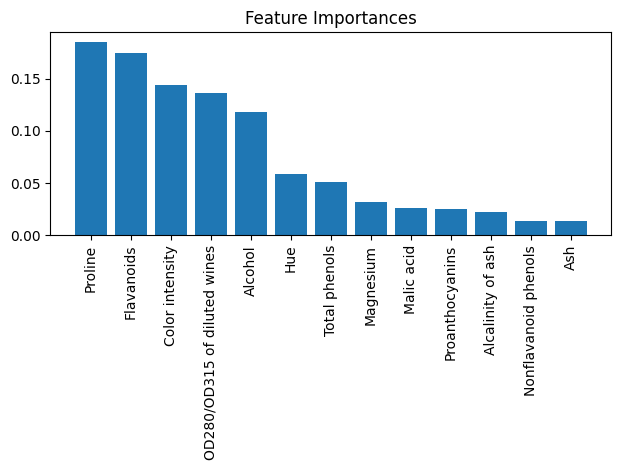

In [25]:
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center'
        )

plt.xticks(range(X_train.shape[1]),feat_labels[indices], rotation=90)

plt.xlim([-1, X_train.shape[1]])

plt.tight_layout()

plt.show()

> After executing the code, we created a plot that ranks the different features in the Wine dataset by their
relative importance; note that the feature importance values are normalized so that they sum up to 1.0. We can conclude that the proline and flavonoid levels, the color intensity, the OD280/OD315 diffraction,
and the alcohol concentration of wine are the most discriminative features in the dataset based on
the average impurity decrease in the 500 decision trees.

Lastly, it is worth mentioning
that scikit-learn also implements a SelectFromModel object that selects features based on a user-specified
threshold after model fitting, which is useful if we want to use the RandomForestClassifier as
a feature selector and intermediate step in a scikit-learn Pipeline object, which allows us to connect
different preprocessing steps with an estimator,

In [32]:
# Using select from model

sfm = SelectFromModel(forest, threshold = 0.1, prefit=True)

X_selected = sfm.transform(X_train)

print(f'Features that meet this threshold are --> {X_selected.shape[1]}')

for f in range(X_selected.shape[1]):
    print('%2d) %-*s %f' % (f + 1, 30, feat_labels[indices[f]],
                            importances[indices[f]]
                            ))


Features that meet this threshold are --> 5
 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529


c:\Users\INNO\Documents\Python Development\Python Machine Learning - Third Edition\.py_ml_venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
